In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Collection

In [30]:
airbnb = pd.read_csv('C:\\Users\\moham\\Downloads\\Airbnb NYC 2019.csv')

# Data Exploration

In [31]:
#data first few rows
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
#data types
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [33]:
#Basic Statistics
airbnb[['price', 'minimum_nights', 'number_of_reviews' ,'reviews_per_month', 'availability_365', 'calculated_host_listings_count' ]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,112.781327,7.143982
std,240.154170,20.510550,44.550582,1.680442,131.622289,32.952519
min,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000
25%,69.000000,1.000000,1.000000,0.190000,0.000000,1.000000
50%,106.000000,3.000000,5.000000,0.720000,45.000000,1.000000
75%,175.000000,5.000000,24.000000,2.020000,227.000000,2.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000,327.000000


# Data Cleaning

In [34]:
#Before removing irrelevent columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [35]:
#Checked Missing Values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
#Removing irrelevent columns
airbnb.drop(['latitude', 'longitude',  'last_review', 'reviews_per_month'], axis=1, inplace=True)

In [37]:
#After removing irrelevent columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [38]:
#with null values 
airbnb.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [39]:
#without null values
airbnb.fillna({'name':"a" , "host_name":"a"}, inplace=True)
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [40]:
# Check for duplicate rows
duplicates = airbnb.duplicated()

# Print the DataFrame with a new column indicating duplicates
airbnb['IsDuplicate'] = duplicates
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,IsDuplicate
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9,False
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36,False
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27,False
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2,False


# Basic Statistics:

In [41]:
avg_room_type = airbnb.groupby(['room_type'])['price'].mean()
avg_room_type

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

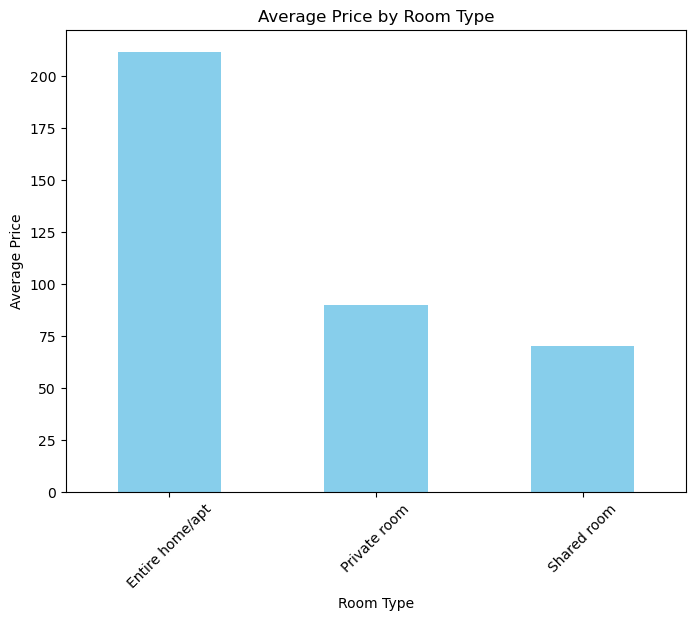

In [42]:
# Plot the average prices
plt.figure(figsize=(8, 6))
avg_room_type.plot(kind='bar', color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)
plt.show()


In [43]:
aa = airbnb.groupby(['neighbourhood_group'])['price'].mean()
aaa=aa.sort_values(ascending = False)
aaa

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

In [44]:
c = airbnb.neighbourhood_group.value_counts()
c

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [45]:
q = airbnb['neighbourhood'].value_counts()
q.sum()

48895

# Visualization

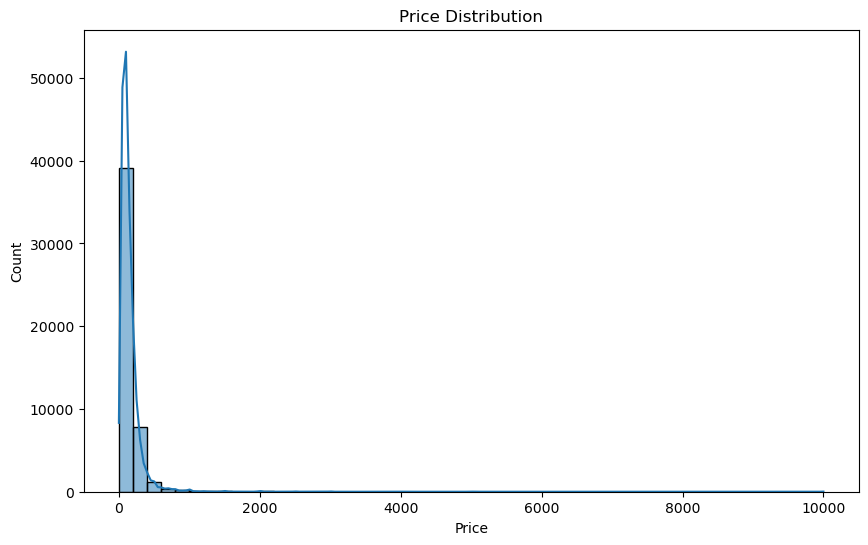

In [51]:
# Price distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(airbnb['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()


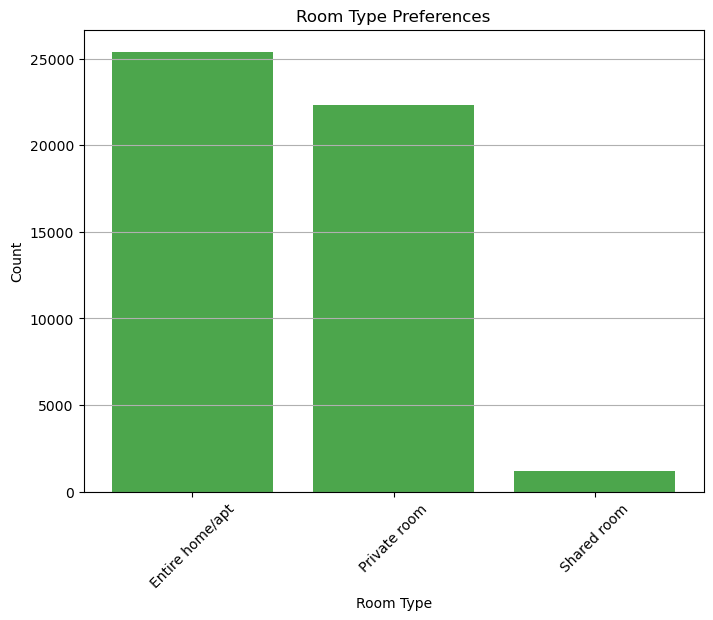

In [48]:
# Room type preferences
room_type_counts = airbnb['room_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color='green', alpha=0.7)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Preferences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


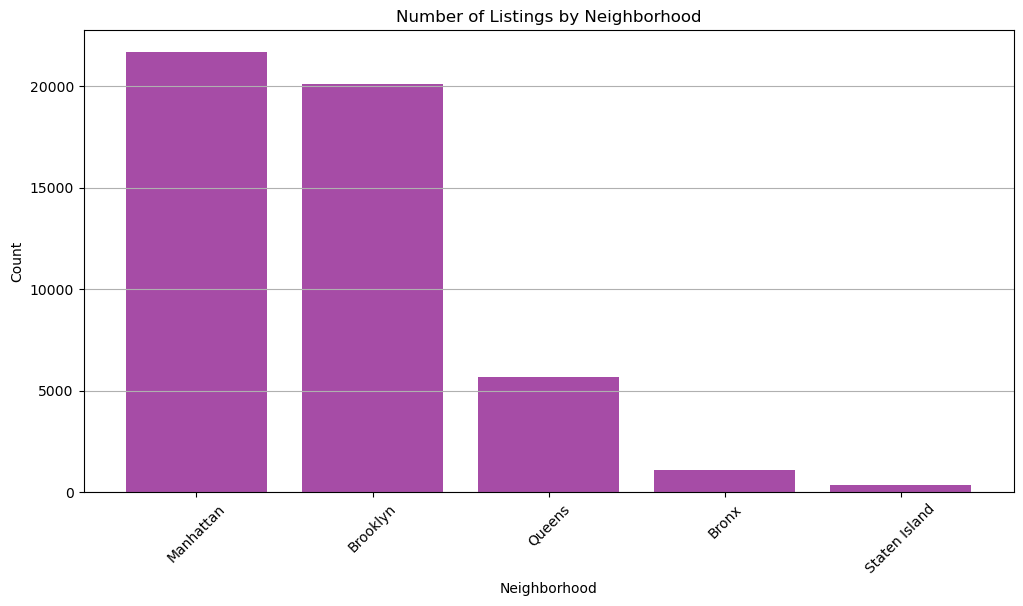

In [49]:
# Number of listings by neighborhood
neighborhood_counts = airbnb['neighbourhood_group'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_counts.index, neighborhood_counts.values, color='purple', alpha=0.7)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Number of Listings by Neighborhood')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Correlation Analysis

In [56]:
# Calculate the correlation matrix
correlation_matrix = airbnb.corr()

# Print the correlation matrix
print(correlation_matrix)

# Correlation between number of room and price
bedrooms_price_corr = correlation_matrix.loc['room_type', 'price']
print(f'Correlation between number of bedrooms and price: {bedrooms_price_corr:.2f}')

# Correlation between reviews and booking rates
reviews_booking_corr = correlation_matrix.loc['number_of_reviews', 'reviews_per_month']
print(f'Correlation between number of reviews and reviews per month: {reviews_booking_corr:.2f}')


C:\Users\moham\AppData\Local\Temp\ipykernel_11868\1540531117.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airbnb.corr()


                                      id   host_id     price  minimum_nights  \
id                              1.000000  0.588290  0.010619       -0.013224   
host_id                         0.588290  1.000000  0.015309       -0.017364   
price                           0.010619  0.015309  1.000000        0.042799   
minimum_nights                 -0.013224 -0.017364  0.042799        1.000000   
number_of_reviews              -0.319760 -0.140106 -0.047954       -0.080116   
calculated_host_listings_count  0.133272  0.154950  0.057472        0.127960   
availability_365                0.085468  0.203492  0.081829        0.144303   
IsDuplicate                          NaN       NaN       NaN             NaN   

                                number_of_reviews  \
id                                      -0.319760   
host_id                                 -0.140106   
price                                   -0.047954   
minimum_nights                          -0.080116   
number_of_revi

KeyError: 'room_type'

# Data Insights

In [ ]:
1. **Number of Bedrooms and Price:**
   - There is a weak positive correlation between the number of bedrooms and price, indicating that more bedrooms tend to result in slightly higher prices.

2. **Popular Neighborhoods:**
   - To determine the most popular neighborhoods, further analysis of the dataset is needed to identify which areas have the highest number of listings, reviews, or booking rates.

3. **Factors Affecting Listing Prices:**
   - Potential factors influencing listing prices include neighborhood, room type, minimum nights, availability, reviews, ratings, and seasonality.

4. **Further Analysis Required:**
   - Deeper analysis, including regression modeling or feature importance analysis, is necessary to understand the precise impact of these factors on listing prices.

In summary, the analysis provides initial insights into the relationship between bedrooms and prices and suggests factors that may affect listing prices, but a more in-depth exploration is needed for a comprehensive understanding of neighborhood popularity and pricing dynamics.